# Exploratory data and visual analysis

## Content
1. Import libraries and data
2. Create new columns
3. Correlation heatmap
4. Scatterplots
5. Pair plots
6. Create categories and new columns
7. Categorical plots
8. Answers to business questions
9. Define hypotheses to test
10. Export data

## 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

# Turn project folder path into a string
path = r'C:\Users\Lara\Career Foundry Projects\Wake County Housing Market 2023'

# Import data file using os library
df_res = pd.read_csv (os.path.join(path, 'Data','Prepared Data', 'residential_properties_cleaned.csv'), index_col = False)

In [2]:
# Set floating numbers to be rounded to only 2 decimals
# pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Set new limits for displaying rows
pd.set_option('display.max_rows', 1000)

In [4]:
# Chexk matplotlib version
matplotlib.__version__

'3.7.1'

In [5]:
# Display the charts you created without the need to "call" them specifically.
%matplotlib inline

In [6]:
df_res.head()

,real_estate_id,land_sale_price,land_sale_date,deeded_acreage,total_sale_price,total_sale_date,assessed_building_value,assessed_land_value,year_built,units,...,utilities,addition_year,effective_year,remodeled_year,story_height,design_style,bath,type_and_use,city,zip_code
0,19,0,00.00.0000,0.21,34500,01.01.1974,134321,115000,1964,1,...,ALL,0,1980,0,1 story,Split level,2 bath,1 family,RALEIGH,27610
1,20,0,00.00.0000,0.46,35500,18.05.1983,114933,45000,1970,1,...,E,0,1985,0,1 story,Conventional,1 bath,1 family,RALEIGH,27610
2,21,28000,26.03.1999,0.43,0,00.00.0000,132624,90000,1999,1,...,ALL,0,1999,0,1 story,Conventional,2 bath,1 family,RALEIGH,27606
3,22,0,00.00.0000,0.46,37500,16.09.2004,118723,32000,1900,1,...,WSE,0,1960,0,1 story,Conventional,2 bath,1 family,WENDELL,27591
4,23,0,00.00.0000,0.79,210000,27.06.2018,105618,112500,1916,2,...,ALL,0,1960,0,2 story,Conversion,NO of fixtures,2 family,RALEIGH,27606


In [7]:
df_res.shape

(344567, 21)

In [8]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344567 entries, 0 to 344566
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   real_estate_id           344567 non-null  int64  
 1   land_sale_price          344567 non-null  int64  
 2   land_sale_date           344567 non-null  object 
 3   deeded_acreage           344567 non-null  float64
 4   total_sale_price         344567 non-null  int64  
 5   total_sale_date          344567 non-null  object 
 6   assessed_building_value  344567 non-null  int64  
 7   assessed_land_value      344567 non-null  int64  
 8   year_built               344567 non-null  int64  
 9   units                    344567 non-null  int64  
 10  heated_area              344567 non-null  int64  
 11  utilities                344567 non-null  object 
 12  addition_year            344567 non-null  int64  
 13  effective_year           344567 non-null  int64  
 14  remo

## 2. Create new columns 

In [9]:
# Create new column 'house_age' from column 'year_built'
df_res['house_age'] = 2023 - df_res['year_built']

In [10]:
# Create new column 'effective_age' from column 'effective_year'
df_res['effective_age'] = 2023 - df_res['effective_year']

In [11]:
df_res[['year_built', 'house_age', 'effective_year', 'effective_age']]

,year_built,house_age,effective_year,effective_age
0,1964,59,1980,43
1,1970,53,1985,38
2,1999,24,1999,24
3,1900,123,1960,63
4,1916,107,1960,63
...,...,...,...,...
344562,1964,59,1964,59
344563,1969,54,1969,54
344564,1940,83,1970,53
344565,1940,83,1975,48


In [12]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344567 entries, 0 to 344566
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   real_estate_id           344567 non-null  int64  
 1   land_sale_price          344567 non-null  int64  
 2   land_sale_date           344567 non-null  object 
 3   deeded_acreage           344567 non-null  float64
 4   total_sale_price         344567 non-null  int64  
 5   total_sale_date          344567 non-null  object 
 6   assessed_building_value  344567 non-null  int64  
 7   assessed_land_value      344567 non-null  int64  
 8   year_built               344567 non-null  int64  
 9   units                    344567 non-null  int64  
 10  heated_area              344567 non-null  int64  
 11  utilities                344567 non-null  object 
 12  addition_year            344567 non-null  int64  
 13  effective_year           344567 non-null  int64  
 14  remo

## 3. Correlation heatmap

In [13]:
# Create subset with variables for heatmap
df_sub = df_res[['deeded_acreage', 'heated_area', 'house_age', 'effective_age', 'total_sale_price',
                'assessed_building_value', 'assessed_land_value']]

In [14]:
# Create correlation matrix
df_sub.corr()

,deeded_acreage,heated_area,house_age,effective_age,total_sale_price,assessed_building_value,assessed_land_value
deeded_acreage,1.000000,0.012080,0.039806,0.045387,-0.006602,0.092116,0.883475
heated_area,0.012080,1.000000,-0.299021,-0.346473,0.519055,0.418936,0.031888
house_age,0.039806,-0.299021,1.000000,0.853541,-0.267584,-0.168830,0.038052
effective_age,0.045387,-0.346473,0.853541,1.000000,-0.354857,-0.198773,0.026759
total_sale_price,-0.006602,0.519055,-0.267584,-0.354857,1.000000,0.376588,0.025058
assessed_building_value,0.092116,0.418936,-0.168830,-0.198773,0.376588,1.000000,0.290788
assessed_land_value,0.883475,0.031888,0.038052,0.026759,0.025058,0.290788,1.000000


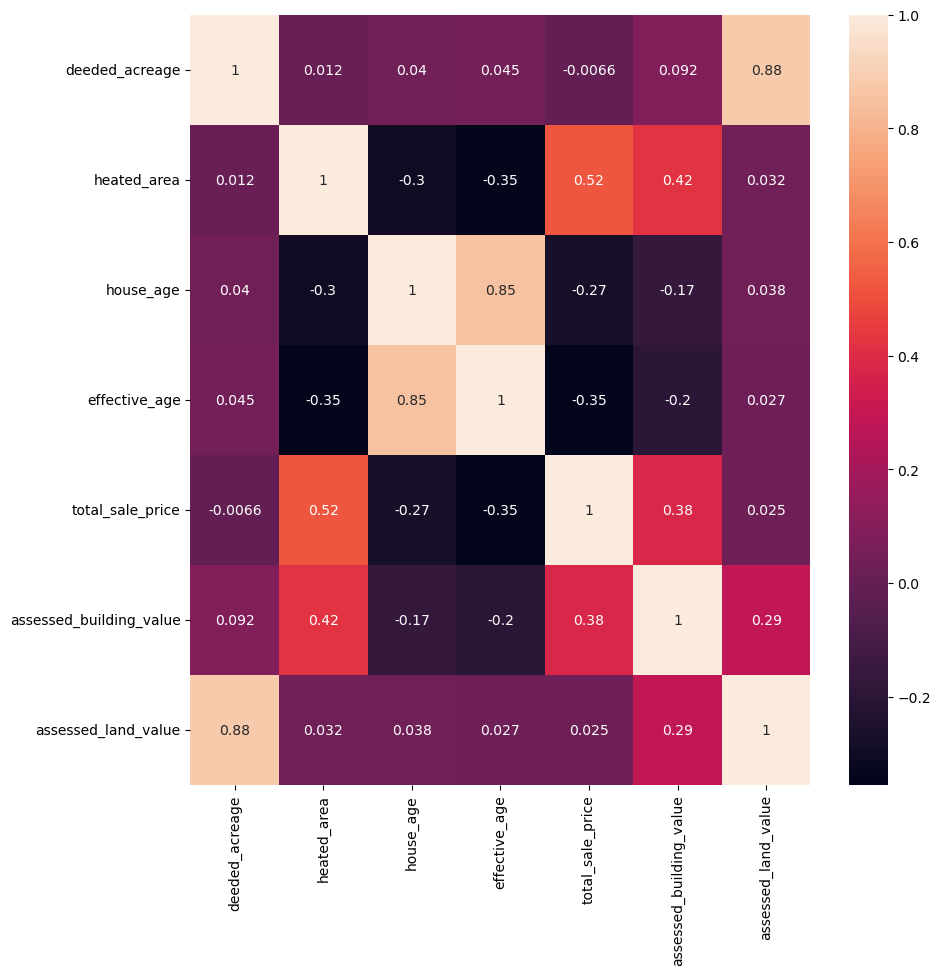

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

In [16]:
# Save object corr as image file
corr.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'correlation_heatmap.png'), bbox_inches = 'tight')

#### Meanings: deeded acreage is size of lot as written in the deed; heated area - square footage of house where heating/cooling is available; effective age - how much house is old based on structure and other assessed values performed for apraisal for determining property tax; assessed values are appraised values for purpose of determining property tax.
#### Comment: Highest positive correlation are between as. land value and deeded acreage (0.98) which makes sense as larger land is more expensive. Strong positive correlation is between house age and effective (0.85), but this is not interesting to explore at all. There are moderately strong negative correlations that are not interesting for analysis, such as heated area and house age or effective age (-0.3 and -0.35) because it meand that newer houses have more sq feet where there is heating/cooling. It is interesting to see that age of house (both real and effective) are negatively correlated with as. building value, but possitivelly correlated with as. land value. So, it means that the more time passes by, house value depreciate and land value increases. 
#### Correlations worth exploring are:
#### a) positive corr. : total sale price with heated area (0.52) and as. building value (0.38) ; as. building value with heated area (0.42); as. land value and deeded acreage (0.8)
#### b) negative corr. : total sale price with house age (-0.27) and effective age (-0.35)

## 4. Scatterplots

#### I'll explore variables with 2 strongest absolute correlations from the list of correlations "worth exploring" above. For other combinations I will use pair plots in next section.

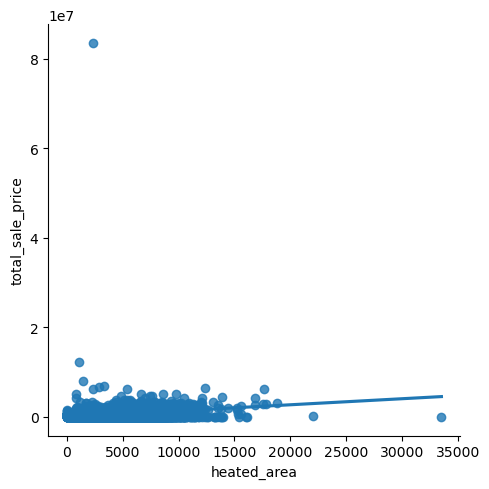

In [17]:
# Create scatterplot for 'total_sale_price' and 'heated_area'
price_size = sns.lmplot(x = 'heated_area', y = 'total_sale_price', data = df_sub)

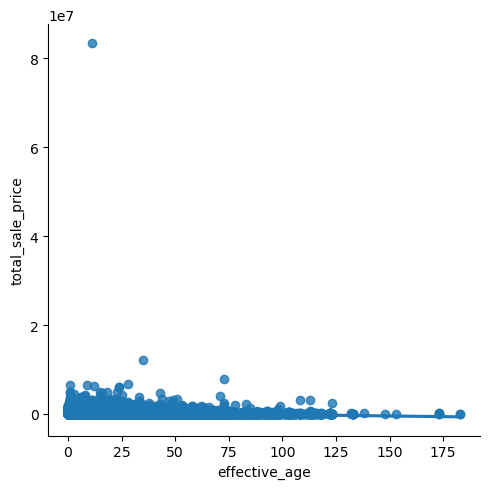

In [18]:
# Create scatterplot for 'total_sale_price' and 'effective_age'
price_ef_age = sns.lmplot(x = 'effective_age', y = 'total_sale_price', data = df_sub)

####  These 2 plots don't offer any new insight, because there are a lot of values around 0 total sale price. A lot of houses were never re-sold and their total sale price is set to 0 in data set (their sale date was set to be 00.00.0000). Also it looks like there are 2 houses with total sale price above 10 millions, one of about 10-12 millions and second of about 80 million. All this hugely affects botom part of the plot as all values below 10 million are all crammed up.

In [19]:
# Explore all outliers for column 'total_sale_price'
df_res['total_sale_price'].describe()

count    3.445670e+05
mean     2.933498e+05
std      2.700290e+05
min      0.000000e+00
25%      1.470000e+05
50%      2.535000e+05
75%      3.900000e+05
max      8.350000e+07
Name: total_sale_price, dtype: float64

In [20]:
df_res['total_sale_price'].value_counts().sort_index()

total_sale_price
0           20197
5               1
250             4
313            16
315             1
            ...  
6616500         1
6800000         1
7940000         1
12187600        1
83500000        1
Name: count, Length: 4296, dtype: int64

In [21]:
# Create new subset where values <5000 and >10000000 in column 'total_sale_price' were excluded
df_res2 = df_res.drop(df_res[df_res['total_sale_price'] < 5000].index)
df_res3 = df_res2.drop(df_res2[df_res2['total_sale_price'] > 10000000].index)

In [22]:
df_res3['total_sale_price'].value_counts().sort_index()

total_sale_price
5000       226
5500        39
5800         1
6000       103
6500        43
          ... 
6260000      1
6498000      1
6616500      1
6800000      1
7940000      1
Name: count, Length: 4261, dtype: int64

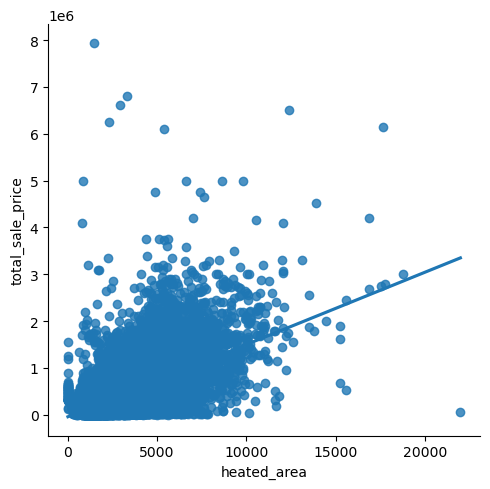

In [23]:
# Plot both scatterplots again
price_size_2 = sns.lmplot(x = 'heated_area', y = 'total_sale_price', data = df_res3)

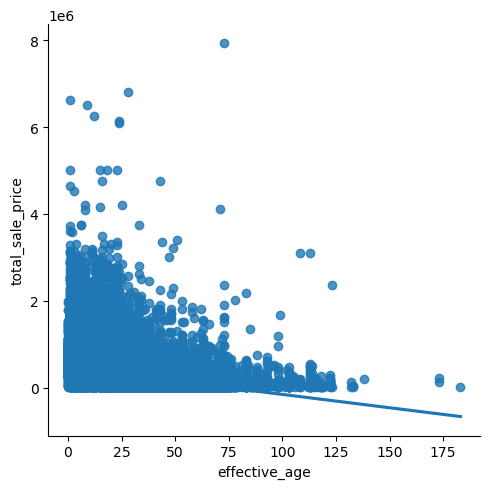

In [24]:
price_ef_age_2 = sns.lmplot(x = 'effective_age', y = 'total_sale_price', data = df_res3)

In [25]:
# Save objects price_size_2 and price_ef_age_2 as image file
price_size_2.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'scatterplot_price_size_no_outliers.png'), bbox_inches = 'tight')
price_ef_age_2.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'scatterplot_price_ef_age_no_outliers.png'), bbox_inches = 'tight')

#### Comment: Now scatterplots give as more information and it looks like total sale price is moderatly positively correlated with heated area, which makes sense as the bigger the house usually the bigger the price. Some of the older houses have less heated area, but are occasionally more valuable. Still, majority of houses is sold under 1 million and a lot were sold for 1-2 million which concentrated data around bottom left corner.
#### Second scatterplot shows moderate-weak negative correlation between total sale price of the house and effective age. Which implies that age estimation for house does affect the price in a sence that newer houses are more expensive. There are quite a number of outliers as sometimes older houses are more valuable, but I can se a decline in prices after effective age of 25 and here I start to notice more outliers too.

## 5. Pair plots

In [26]:
df_res.columns

Index(['real_estate_id', 'land_sale_price', 'land_sale_date', 'deeded_acreage',
       'total_sale_price', 'total_sale_date', 'assessed_building_value',
       'assessed_land_value', 'year_built', 'units', 'heated_area',
       'utilities', 'addition_year', 'effective_year', 'remodeled_year',
       'story_height', 'design_style', 'bath', 'type_and_use', 'city',
       'zip_code', 'house_age', 'effective_age'],
      dtype='object')

In [27]:
df_sub.columns

Index(['deeded_acreage', 'heated_area', 'house_age', 'effective_age',
       'total_sale_price', 'assessed_building_value', 'assessed_land_value'],
      dtype='object')

In [28]:
# Adding column 'remodeled_year' to subset df_sub to see if this too has some effect on the price or value of house or land
df_sub2 = df_res[['deeded_acreage', 'heated_area', 'house_age', 'effective_age', 'remodeled_year', 'total_sale_price',
                  'assessed_building_value', 'assessed_land_value']]

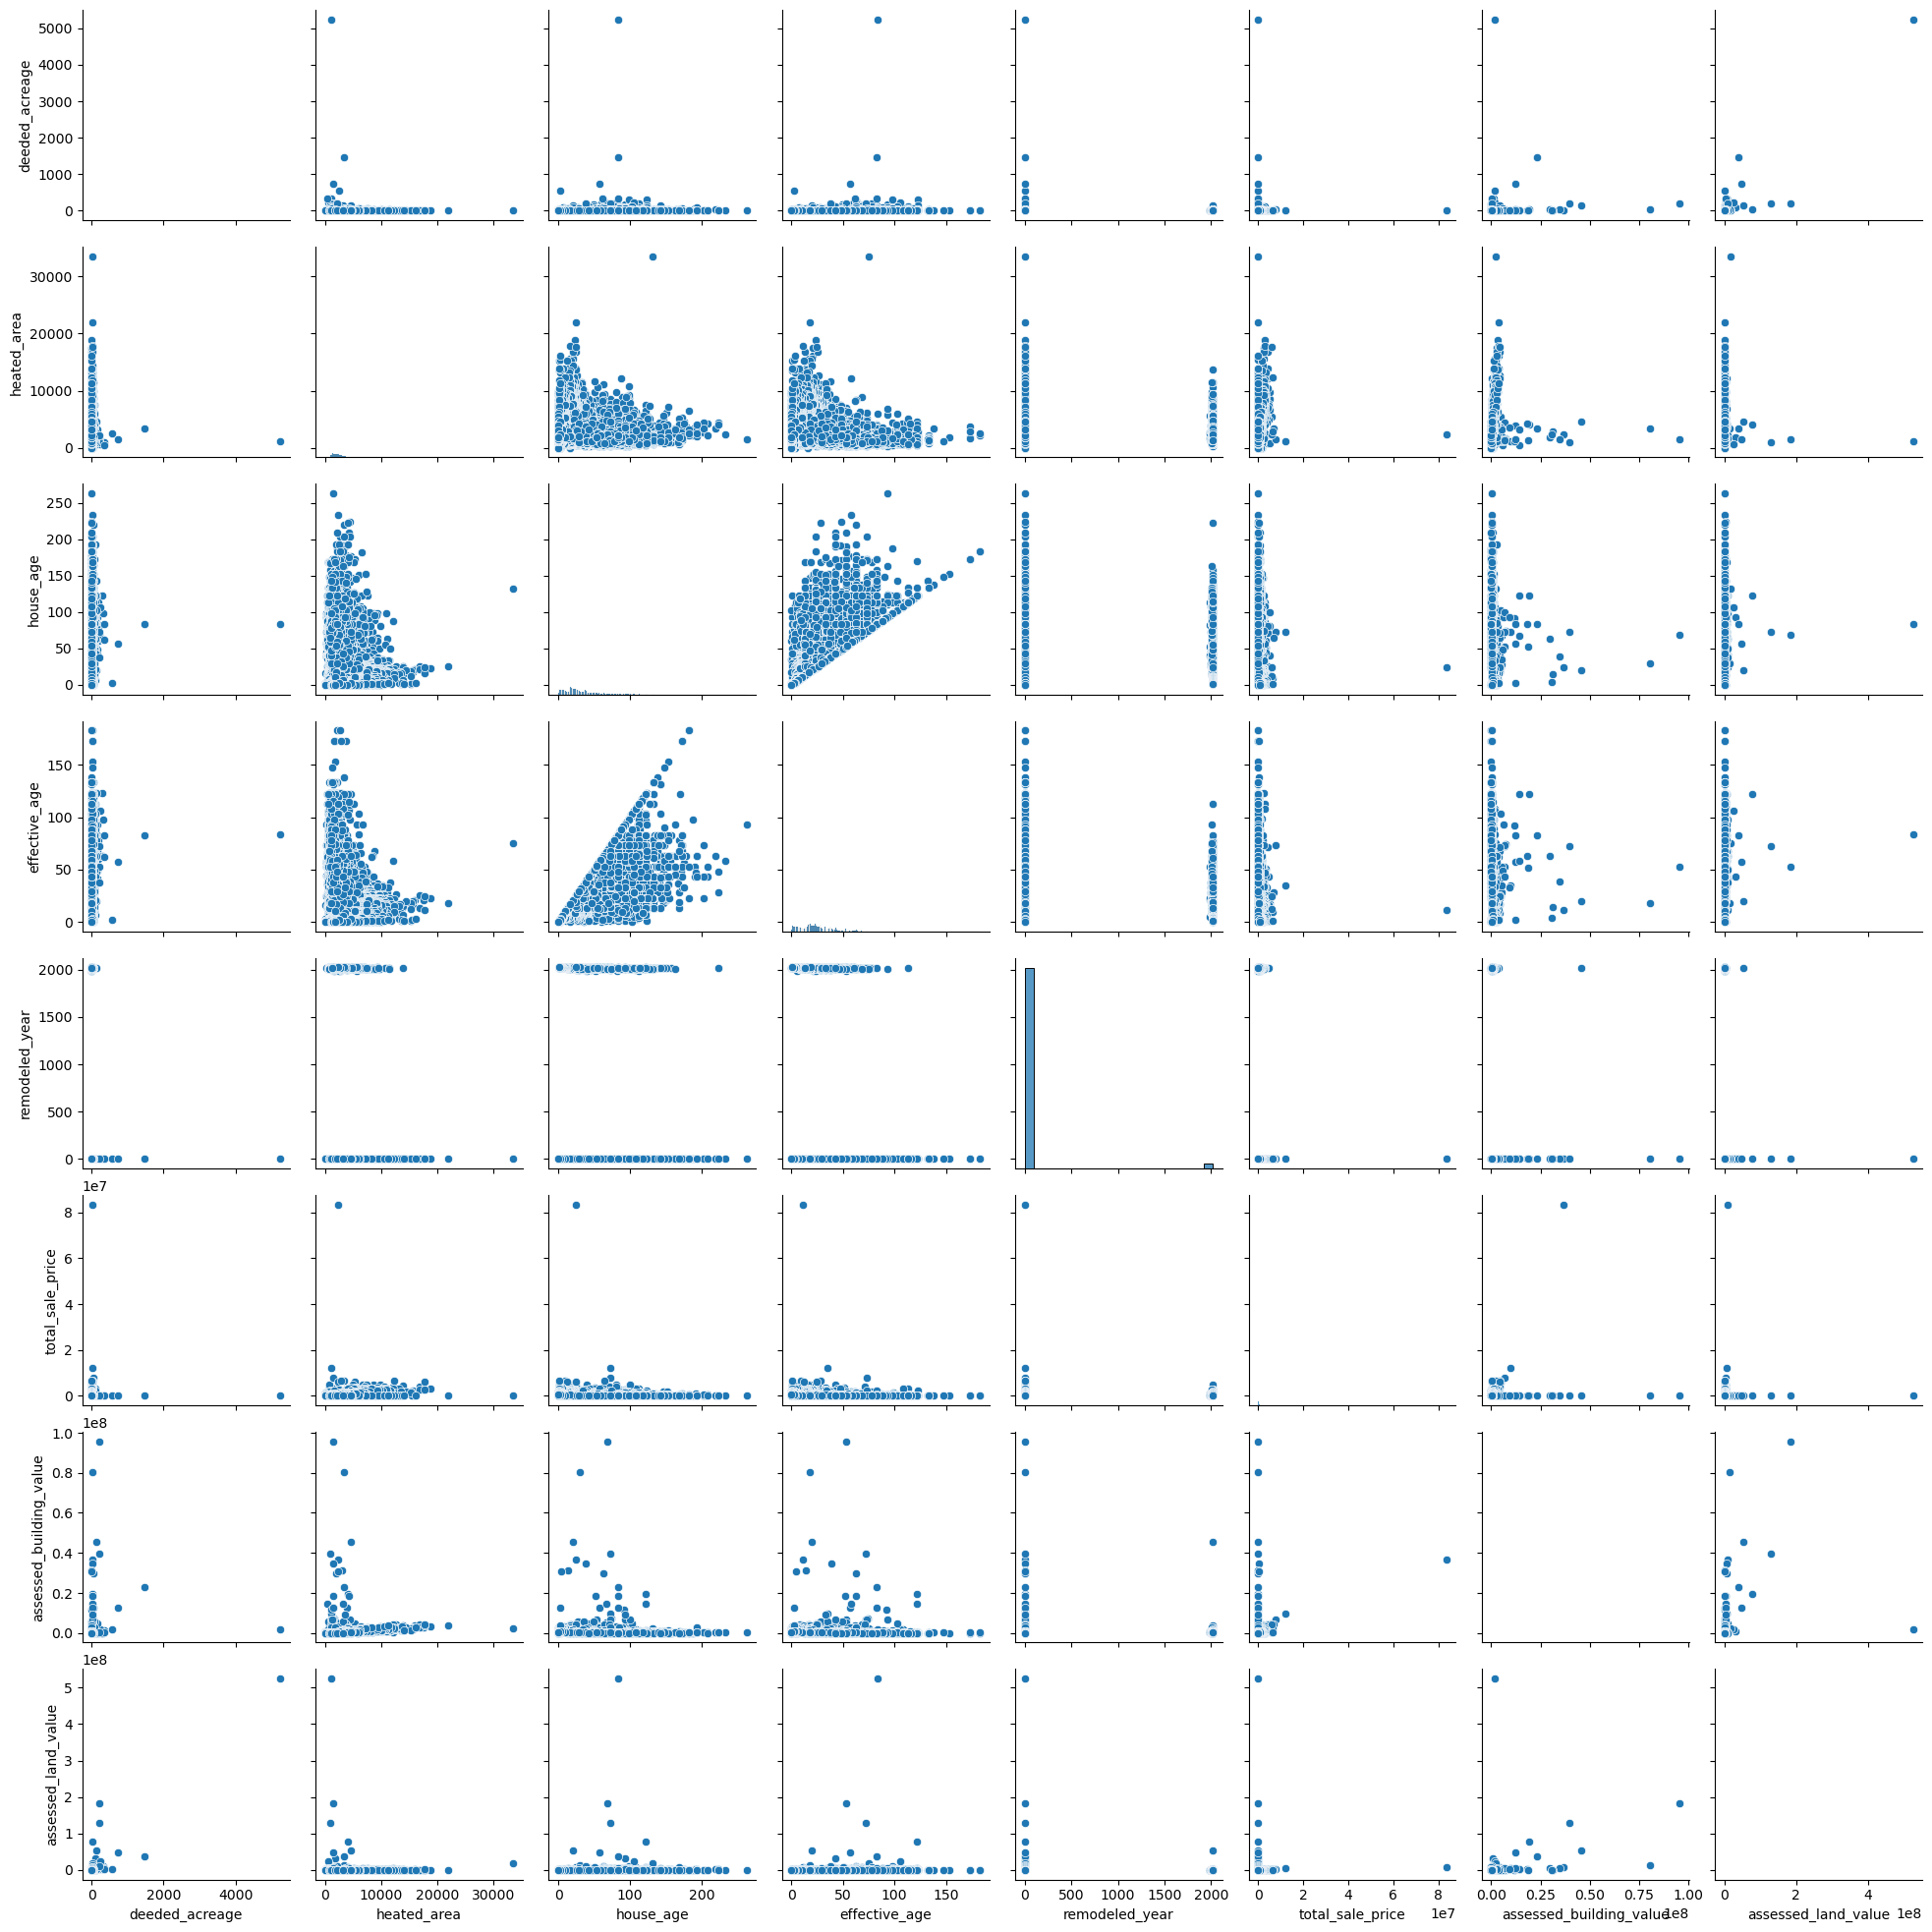

In [29]:
# Pair plots
g = sns.pairplot(df_sub2)

#### Comment: because there are outliers with huge prices and also assessed values, a lot of smaller values are crammed up on x-axis of scatterplots that explore these values (4 vriables with either price or value). I can see that there are sort of a cut off values in scatterplot comparing house age and effective age. As discussed above total sale price and assessed building value both depend on heated area, house age and/or effective age. I can't really see if remodeled year affect price or value of the house. 

## 6. Create categories and new columns

<Axes: xlabel='assessed_land_value', ylabel='Count'>

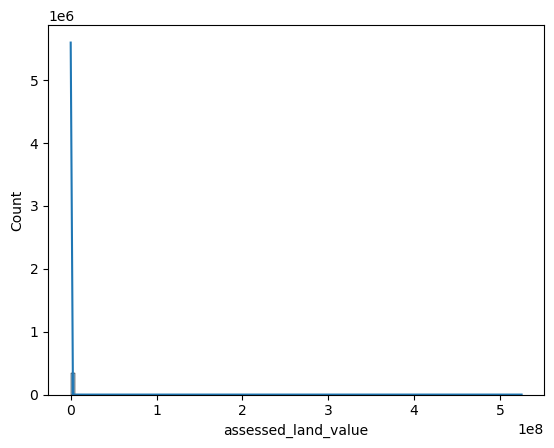

In [30]:
# Histograms for all 4 columns with price or value are heavily skewed because of huge values of outliers
sns.histplot(df_res['assessed_land_value'], bins = 100, kde = True)

In [31]:
df_sub2.describe()

,deeded_acreage,heated_area,house_age,effective_age,remodeled_year,total_sale_price,assessed_building_value,assessed_land_value
count,344567.000000,344567.000000,344567.000000,344567.000000,344567.000000,3.445670e+05,3.445670e+05,3.445670e+05
mean,0.551628,2304.142454,27.552313,24.043632,48.159203,2.933498e+05,2.609870e+05,9.558989e+04
std,9.810628,1038.336110,20.820549,15.961810,307.909151,2.700290e+05,3.253966e+05,1.001383e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.360000e+02,0.000000e+00
25%,0.140000,1552.000000,14.000000,13.000000,0.000000,1.470000e+05,1.583090e+05,4.500000e+04
50%,0.240000,2117.000000,23.000000,22.000000,0.000000,2.535000e+05,2.261630e+05,6.900000e+04
75%,0.430000,2832.000000,38.000000,33.000000,0.000000,3.900000e+05,3.183860e+05,1.050000e+05
max,5245.450000,33539.000000,263.000000,183.000000,2023.000000,8.350000e+07,9.566247e+07,5.251450e+08


#### Officially median house price in Wake county in 2023 is about 500000, and median house value 300000. I will use these value as a guide when making categories. 

In [32]:
# Create categories for "total_sale_price" with new column
df_res.loc[df_res['total_sale_price'] < 200000, 'price_group'] = 'Low price'
df_res.loc[(df_res['total_sale_price'] >= 200000) & (df_res['total_sale_price'] < 800000), 'price_group'] = 'Middle price'
df_res.loc[(df_res['total_sale_price'] >= 800000) & (df_res['total_sale_price'] < 2000000), 'price_group'] = 'High price'
df_res.loc[df_res['total_sale_price'] >= 2000000, 'price_group'] = 'Very high price'

In [33]:
# Check the values
df_res['price_group'].value_counts()

price_group
Middle price       203936
Low price          131035
High price           9264
Very high price       332
Name: count, dtype: int64

In [34]:
# Create categories for 'assessed_building_value' with new column. I'll use the same conditions as when making 'price_group'
df_res.loc[df_res['assessed_building_value'] < 200000, 'value_group'] = 'Low value'
df_res.loc[(df_res['assessed_building_value'] >= 200000) & (df_res['assessed_building_value'] < 800000), 'value_group'] = 'Middle value'
df_res.loc[(df_res['assessed_building_value'] >= 800000) & (df_res['assessed_building_value'] < 2000000), 'value_group'] = 'High value'
df_res.loc[df_res['assessed_building_value'] >= 2000000, 'value_group'] = 'Very high value'

In [35]:
# Check the values
df_res['value_group'].value_counts()

value_group
Middle value       200531
Low value          140427
High value           3421
Very high value       188
Name: count, dtype: int64

#### For heated area I'll use roughly values of 25%, 50% and 75% percentile as a guide.

In [36]:
# Create categories for 'heated_area' with new column
df_res.loc[df_res['heated_area'] < 1500, 'house_size'] = 'Small house'
df_res.loc[(df_res['heated_area'] >= 1500) & (df_res['heated_area'] < 2500), 'house_size'] = 'Medium house'
df_res.loc[(df_res['heated_area'] >= 2500) & (df_res['heated_area'] < 5000), 'house_size'] = 'Big house'
df_res.loc[df_res['heated_area'] >= 5000, 'house_size'] = 'Very big house'

In [37]:
# Check the values
df_res['house_size'].value_counts()

house_size
Medium house      144726
Big house         115424
Small house        77715
Very big house      6702
Name: count, dtype: int64

#### New house is considered a house built in last few years. I'll set this at 5 years

In [38]:
# Create categories for 'house_age' with new column
df_res.loc[df_res['house_age'] < 5, 'house_age_group'] = 'New house'
df_res.loc[(df_res['house_age'] >= 5) & (df_res['house_age'] < 50), 'house_age_group'] = 'Mid-age house'
df_res.loc[(df_res['house_age'] >= 50) & (df_res['house_age'] < 100), 'house_age_group'] = 'Old house'
df_res.loc[df_res['house_age'] >= 100, 'house_age_group'] = 'Very old house'

In [39]:
# Check the values
df_res['house_age_group'].value_counts()

house_age_group
Mid-age house     260824
Old house          45790
New house          34634
Very old house      3319
Name: count, dtype: int64

In [40]:
# Create categories for 'effective_age' with new column
df_res.loc[df_res['effective_age'] < 5, 'effective_age_group'] = 'Effective new house'
df_res.loc[(df_res['effective_age'] >= 5) & (df_res['effective_age'] < 50), 'effective_age_group'] = 'Effective mid-age house'
df_res.loc[(df_res['effective_age'] >= 50) & (df_res['effective_age'] < 100), 'effective_age_group'] = 'Effective old house'
df_res.loc[df_res['effective_age'] >= 100, 'effective_age_group'] = 'Effective very old house'

In [41]:
# Check the values
df_res['effective_age_group'].value_counts()

effective_age_group
Effective mid-age house     282665
Effective new house          34755
Effective old house          26785
Effective very old house       362
Name: count, dtype: int64

## 7. Categorical plots

#### There are so many different values for prices and assessed values of houses, that I will use categories for every plot for x-axis.

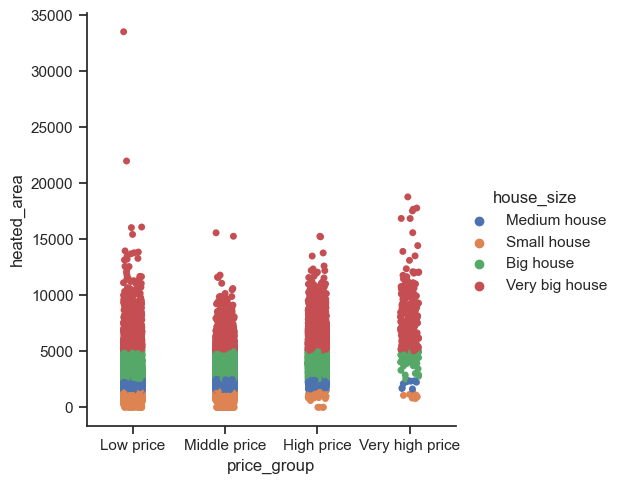

In [42]:
sns.set(style = "ticks")
price_gr_size = sns.catplot(x = "price_group", y = "heated_area", hue = "house_size", data = df_res)

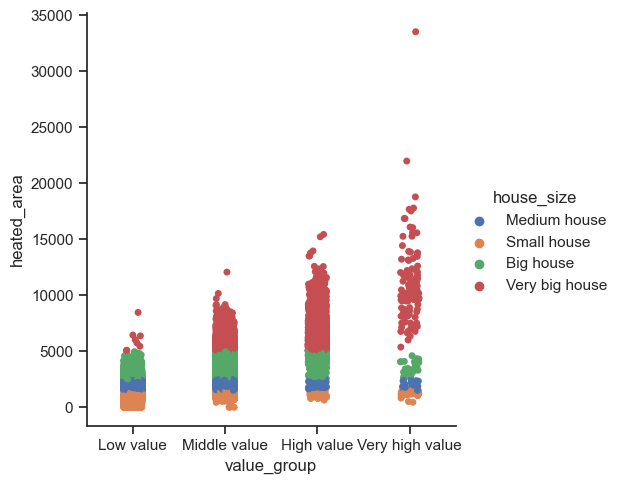

In [43]:
sns.set(style = "ticks")
value_gr_size = sns.catplot(x = "value_group", y = "heated_area", hue = "house_size", data = df_res)

In [44]:
# Save objects as images
price_gr_size.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'catplot_price_gr_size.png'), bbox_inches = 'tight')
value_gr_size.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'catplot_value_gr_size.png'), bbox_inches = 'tight')

#### Here we see that there are some small and medium houses with very high price or value, which I did not expect. It means that there are houses with sq feet less than 1500 which cost more than 2 million. same thing for assessed values. Even more smaller and medium size houses have very high assessed value. There is a huge difference for low value houses - there are significantly less very big houses wu=ith low assessed value. Also for very high value houses there is a  decline in number of big and very big houses.

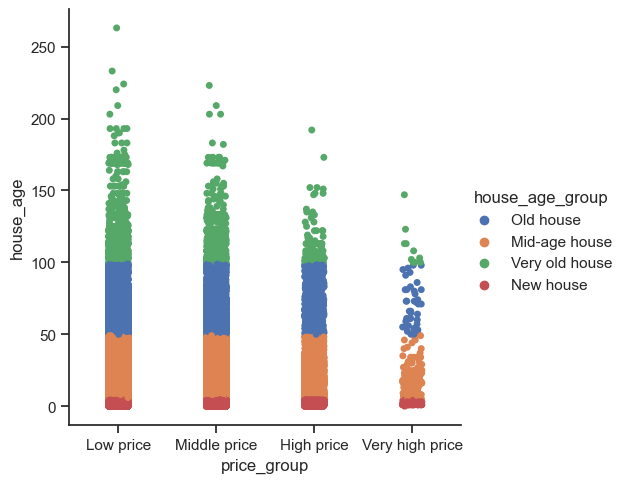

In [45]:
sns.set(style = "ticks")
price_gr_age = sns.catplot(x = "price_group", y = "house_age", hue = "house_age_group", data = df_res)

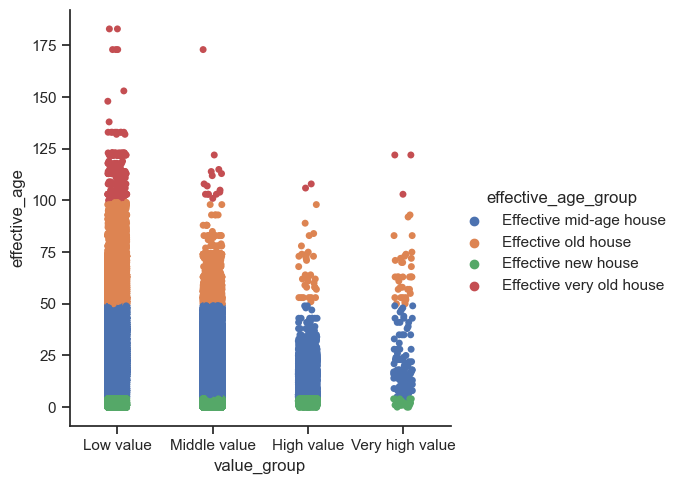

In [46]:
sns.set(style = "ticks")
value_gr_ef_age = sns.catplot(x = "value_group", y = "effective_age", hue = "effective_age_group", data = df_res)

In [47]:
# Save objects as images
price_gr_age.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'catplot_price_gr_age.png'), bbox_inches = 'tight')
value_gr_ef_age.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'catplot_value_gr_ef_age.png'), bbox_inches = 'tight')

#### When comparing 2 catplots above, I noticed that very high priced houses are not older than 150 years and that majority of very old houses are low or medium priced. Effective age caps at about 175 years and in very high value category thera are only few veru=y old houses same as in high value house category. Effective old houses are less umbered in high valued category than old houses in high priced category.

#### All these catplots showed some interesting facts.

## 8. Answers to business questions

#### 1. Does age of residential property affects the price? How much?

Yes, it does. There is medium strenght correlation, and this will still be a good hypothesis to test.

#### 2. How sale price and assessed value of property changed over the years?

This will be answered later.

#### 3. Are properties more expensive in bigger cities? How about cities closer to RTP?

This will be answered later.

#### 4. Does design style, baths, utilities or something else affects assessed value?

Answer given below.

#### 5. Can we forecast price or assessed value of property?

This will be answered later.

#### 6. What is the average age of property, average land deeded, average heated area, average assessed value? How does this compare in each city?

This was answered throug function describe, but wasn't connected to geo location yet. This will be answered later.
Some values are heavily skewed, but answers are given below.

#### 7. In what month are most houses sold? What was average price? Is this similar in each zip code?

This will be answered later.

#### 8. How does age of property compare to effective year? How does this compares to zip codes?

It was shown on correlation heatmap that there is very strong positive correlation (0.85) and scatterplot showed that there is a cut-off value for each actual age what effective age could be. Comparing with geo location was not done yet. This will be answered later.

#### Answer for Q 5 - Let's explore how some other house features affect price or assessed value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Manuf multi'),
  Text(1, 0, 'Manuf sngl'),
  Text(2, 0, 'Log'),
  Text(3, 0, 'Modular'),
  Text(4, 0, 'Ranch'),
  Text(5, 0, 'Split foyer'),
  Text(6, 0, 'Split level'),
  Text(7, 0, 'Conversion'),
  Text(8, 0, 'Condo'),
  Text(9, 0, 'Duplex'),
  Text(10, 0, 'Townhouse'),
  Text(11, 0, 'Colonial'),
  Text(12, 0, 'Conventional'),
  Text(13, 0, 'Contemporary'),
  Text(14, 0, 'Cape'),
  Text(15, 0, 'Unknown')])

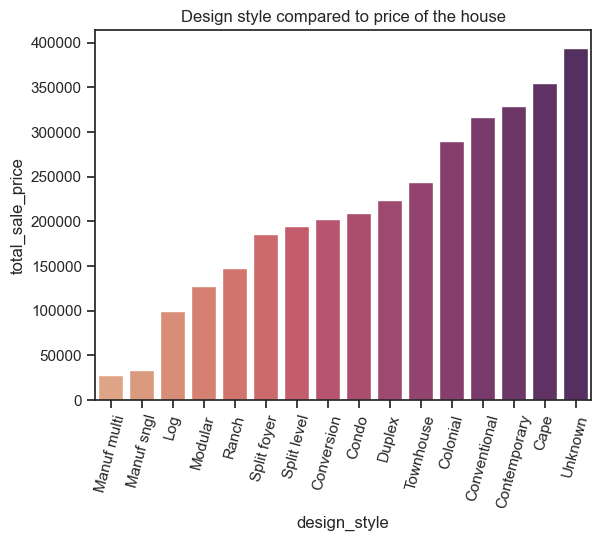

In [48]:
# Design style compared to price of the house

# Group by the design style and set average price
design_p = df_res.groupby('design_style')['total_sale_price'].mean().sort_values().reset_index(drop = False)

# Plot the graph
design_price = sns.barplot(x ='design_style', y = 'total_sale_price', data = design_p, palette = 'flare')
plt.title("Design style compared to price of the house")
plt.xticks(rotation = 75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Conversion'),
  Text(2, 0, 'Ranch'),
  Text(3, 0, 'Manuf multi'),
  Text(4, 0, 'Split foyer'),
  Text(5, 0, 'Manuf sngl'),
  Text(6, 0, 'Split level'),
  Text(7, 0, 'Modular'),
  Text(8, 0, 'Townhouse'),
  Text(9, 0, 'Condo'),
  Text(10, 0, 'Log'),
  Text(11, 0, 'Duplex'),
  Text(12, 0, 'Conventional'),
  Text(13, 0, 'Contemporary'),
  Text(14, 0, 'Cape'),
  Text(15, 0, 'Colonial')])

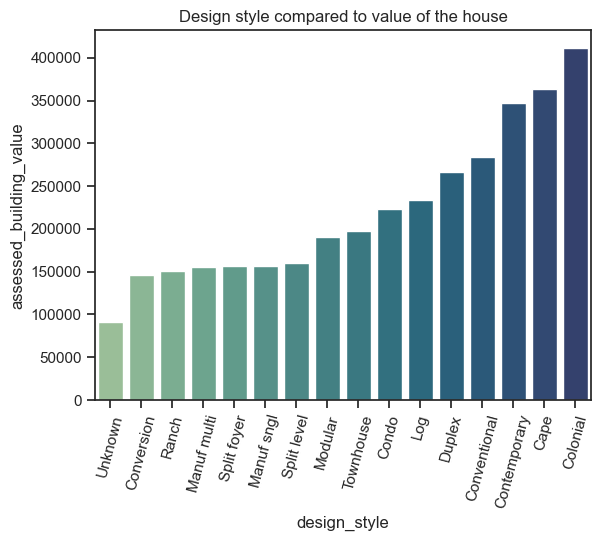

In [49]:
# Design style compared to value of the house

# Group by the design style and set average value
design_v = df_res.groupby('design_style')['assessed_building_value'].mean().sort_values().reset_index(drop = False)

# Plot the graph
design_value = sns.barplot(x ='design_style', y = 'assessed_building_value', data = design_v, palette = 'crest')
plt.title("Design style compared to value of the house")
plt.xticks(rotation = 75)

In [50]:
# Save objects as images
design_price.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'barplot_design_price.png'), bbox_inches = 'tight')
design_value.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'barplot_design_value.png'), bbox_inches = 'tight')

#### It looks like design style is important. Assessed value is highest for colonial, cape or contemporary styles. And the price (excluding unknown) is highest for cape, contemporary and conventional

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'SG'),
  Text(1, 0, 'WSG'),
  Text(2, 0, 'S'),
  Text(3, 0, 'WS'),
  Text(4, 0, 'SGE'),
  Text(5, 0, 'WSE'),
  Text(6, 0, 'W'),
  Text(7, 0, 'G'),
  Text(8, 0, 'SE'),
  Text(9, 0, 'E'),
  Text(10, 0, 'GE'),
  Text(11, 0, 'WE'),
  Text(12, 0, 'ALL'),
  Text(13, 0, 'WGE'),
  Text(14, 0, 'WG'),
  Text(15, 0, 'Unknown')])

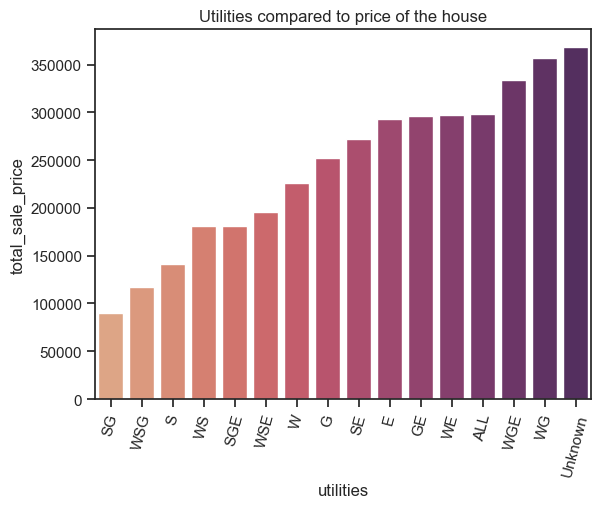

In [51]:
# Utilities compared to price of the house

# Group by the utilities and set average price
utilities_p = df_res.groupby('utilities')['total_sale_price'].mean().sort_values().reset_index(drop = False)

# Plot the graph
util_price = sns.barplot(x ='utilities', y = 'total_sale_price', data = utilities_p, palette = 'flare')
plt.title("Utilities compared to price of the house")
plt.xticks(rotation = 75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'WSG'),
  Text(1, 0, 'G'),
  Text(2, 0, 'SG'),
  Text(3, 0, 'S'),
  Text(4, 0, 'SGE'),
  Text(5, 0, 'WS'),
  Text(6, 0, 'WSE'),
  Text(7, 0, 'W'),
  Text(8, 0, 'SE'),
  Text(9, 0, 'ALL'),
  Text(10, 0, 'WG'),
  Text(11, 0, 'E'),
  Text(12, 0, 'WE'),
  Text(13, 0, 'GE'),
  Text(14, 0, 'WGE'),
  Text(15, 0, 'Unknown')])

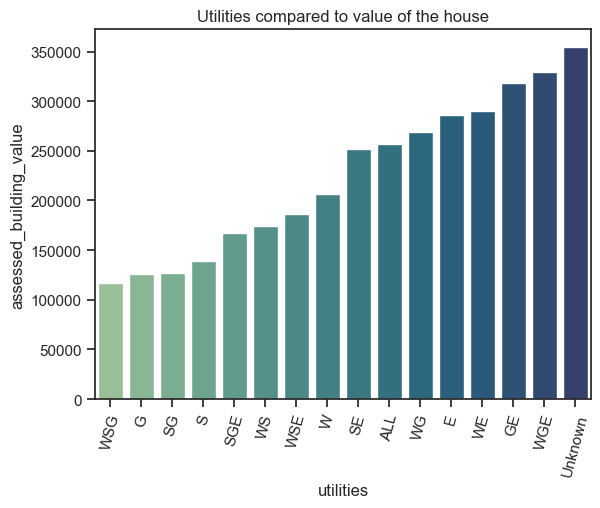

In [52]:
# Utilities compared to value of the house

# Group by the design style and set average value
utilities_v = df_res.groupby('utilities')['assessed_building_value'].mean().sort_values().reset_index(drop = False)

# Plot the graph
util_value = sns.barplot(x ='utilities', y = 'assessed_building_value', data = utilities_v, palette = 'crest')
plt.title("Utilities compared to value of the house")
plt.xticks(rotation = 75)

In [53]:
# Save objects as images
util_price.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'barplot_utilities_price.png'), bbox_inches = 'tight')
util_value.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'barplot_utilities_value.png'), bbox_inches = 'tight')

#### Interestingly houses with less utilities were assessed higher value. It is a bit strange that there are so many houses without electricity that are so highly priced or valued.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'No plumbing'),
  Text(1, 0, '1 bath'),
  Text(2, 0, '1.5 bath'),
  Text(3, 0, '2 bath'),
  Text(4, 0, 'Limited plmg'),
  Text(5, 0, '2.5 bath'),
  Text(6, 0, 'NO of fixtures'),
  Text(7, 0, 'Adequate'),
  Text(8, 0, '3 bath'),
  Text(9, 0, 'Unknown'),
  Text(10, 0, '3.5 bath')])

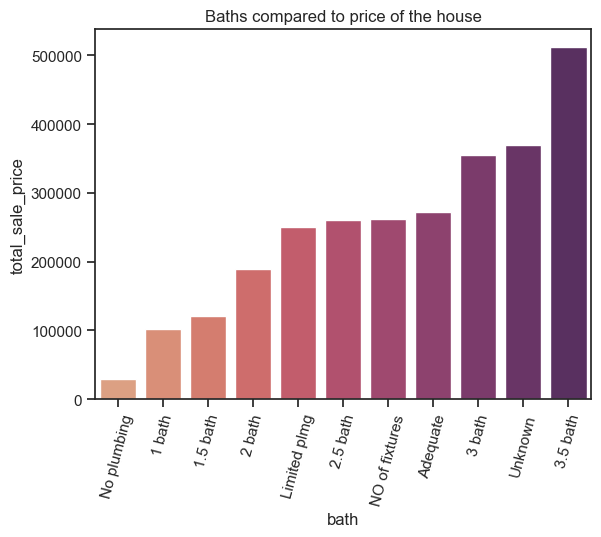

In [54]:
# Baths compared to price of the house

# Group by the design style and set average price
bath_p = df_res.groupby('bath')['total_sale_price'].mean().sort_values().reset_index(drop = False)

# Plot the graph
bath_price = sns.barplot(x ='bath', y = 'total_sale_price', data = bath_p, palette = 'flare')
plt.title("Baths compared to price of the house")
plt.xticks(rotation = 75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1 bath'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, '1.5 bath'),
  Text(3, 0, '2 bath'),
  Text(4, 0, '2.5 bath'),
  Text(5, 0, 'NO of fixtures'),
  Text(6, 0, '3 bath'),
  Text(7, 0, 'No plumbing'),
  Text(8, 0, '3.5 bath'),
  Text(9, 0, 'Adequate'),
  Text(10, 0, 'Limited plmg')])

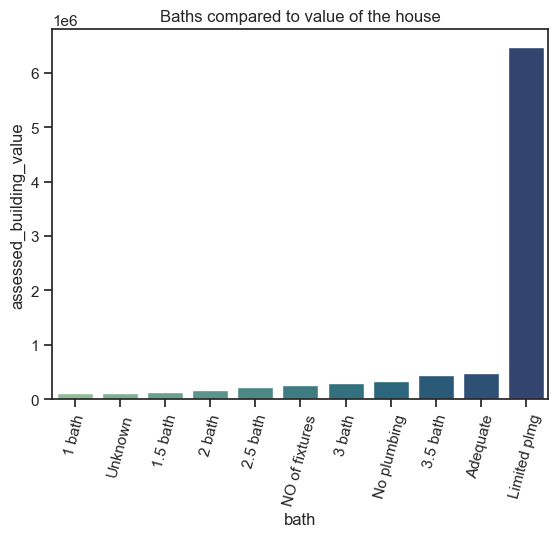

In [55]:
# Baths compared to value of the house

# Group by the design style and set average value
bath_v = df_res.groupby('bath')['assessed_building_value'].mean().sort_values().reset_index(drop = False)

# Plot the graph
bath_value = sns.barplot(x ='bath', y = 'assessed_building_value', data = bath_v, palette = 'crest')
plt.title("Baths compared to value of the house")
plt.xticks(rotation = 75)

In [56]:
# Save objects as images
bath_price.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'barplot_bath_price.png'), bbox_inches = 'tight')
bath_value.figure.savefig(os.path.join(path, 'Analysis','Exploratory analysis plots', 'barplot_bath_value.png'), bbox_inches = 'tight')

#### Higher number of baths (3 or 3.5) is affecting both price and value of house. But it's really weird how "limited pluming" skewed second plot and results. I was not expecting this. Maybe this is just one house.

#### Answers for Q 7

In [57]:
# Average age of property
round(df_res['house_age'].mean(), 2)

27.55

In [58]:
# Average deeded acreage
round(df_res['deeded_acreage'].mean(), 2)

0.55

In [59]:
# Average heated area
round(df_res['heated_area'].mean(), 2)

2304.14

In [60]:
# Average assesed value
round(df_res['assessed_building_value'].mean(), 2)

260987.04

In [61]:
# Average total sale price
round(df_res['total_sale_price'].mean(), 2)

293349.82

## 9. Define hypotheses to test

#### I will update this later with some other hypotheses that have variables about location (zip code and/or city). It looks like size and age of house are variables that most affect value/price house for now. I will use total sale price. I also think a big factor is where the house is located. I will explore this later.
1. Bigger houses have greater sale price.
2. Older houses have smaller sale price.


## 10. Export data

In [62]:
# Export df_res as csv file
df_res.to_csv(os.path.join(path, 'Data','Prepared Data', 'res_prop_exploratory_analysis.csv'), index = False)